<a href="https://colab.research.google.com/github/ThatNinjaGuy/Machine-learning-A-Z-Course/blob/develop/ch27_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [34]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

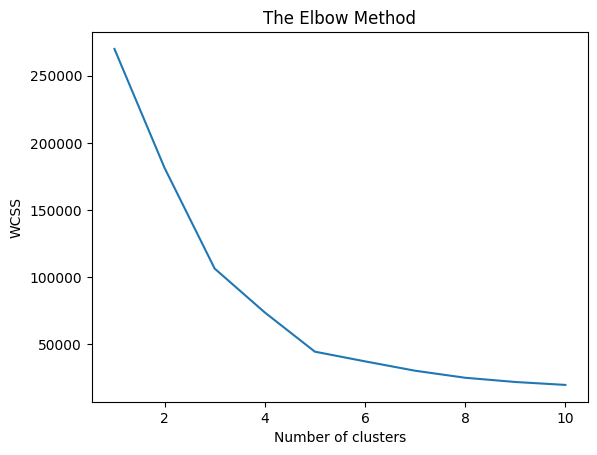

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [36]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [38]:
np.set_printoptions(precision=2)
print(np.concatenate((X.reshape(len(X),2), y_kmeans.reshape(len(y_kmeans),1)),1))

[[ 15  39   2]
 [ 15  81   3]
 [ 16   6   2]
 [ 16  77   3]
 [ 17  40   2]
 [ 17  76   3]
 [ 18   6   2]
 [ 18  94   3]
 [ 19   3   2]
 [ 19  72   3]
 [ 19  14   2]
 [ 19  99   3]
 [ 20  15   2]
 [ 20  77   3]
 [ 20  13   2]
 [ 20  79   3]
 [ 21  35   2]
 [ 21  66   3]
 [ 23  29   2]
 [ 23  98   3]
 [ 24  35   2]
 [ 24  73   3]
 [ 25   5   2]
 [ 25  73   3]
 [ 28  14   2]
 [ 28  82   3]
 [ 28  32   2]
 [ 28  61   3]
 [ 29  31   2]
 [ 29  87   3]
 [ 30   4   2]
 [ 30  73   3]
 [ 33   4   2]
 [ 33  92   3]
 [ 33  14   2]
 [ 33  81   3]
 [ 34  17   2]
 [ 34  73   3]
 [ 37  26   2]
 [ 37  75   3]
 [ 38  35   2]
 [ 38  92   3]
 [ 39  36   2]
 [ 39  61   0]
 [ 39  28   2]
 [ 39  65   3]
 [ 40  55   0]
 [ 40  47   0]
 [ 40  42   0]
 [ 40  42   0]
 [ 42  52   0]
 [ 42  60   0]
 [ 43  54   0]
 [ 43  60   0]
 [ 43  45   0]
 [ 43  41   0]
 [ 44  50   0]
 [ 44  46   0]
 [ 46  51   0]
 [ 46  46   0]
 [ 46  56   0]
 [ 46  55   0]
 [ 47  52   0]
 [ 47  59   0]
 [ 48  51   0]
 [ 48  59   0]
 [ 48  50 

## Visualising the clusters

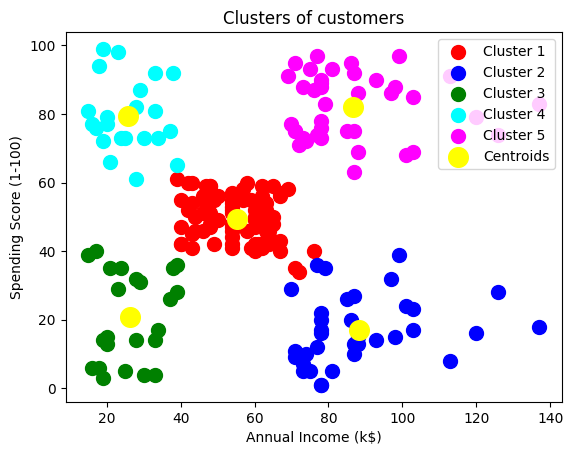

In [39]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, [0]], kmeans.cluster_centers_[:, [1]], s=200, c='yellow', label = 'Centroids')
plt.title(label='Clusters of customers')
plt.xlabel(xlabel='Annual Income (k$)')
plt.ylabel(ylabel='Spending Score (1-100)')
plt.legend(loc='upper right')
plt.show()